In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

plt.rcParams.update({'font.size': 14})

# Interpretarea coeficientilor regresiei

In [2]:
diamond = pd.read_csv('diamond.csv')
diamond.head()

,Unnamed: 0,carat,price
0,1,0.17,355
1,2,0.16,328
2,3,0.17,350
3,4,0.18,325
4,5,0.25,642


intercept: -259.62590719155486 coefficient: 3721.024851550472


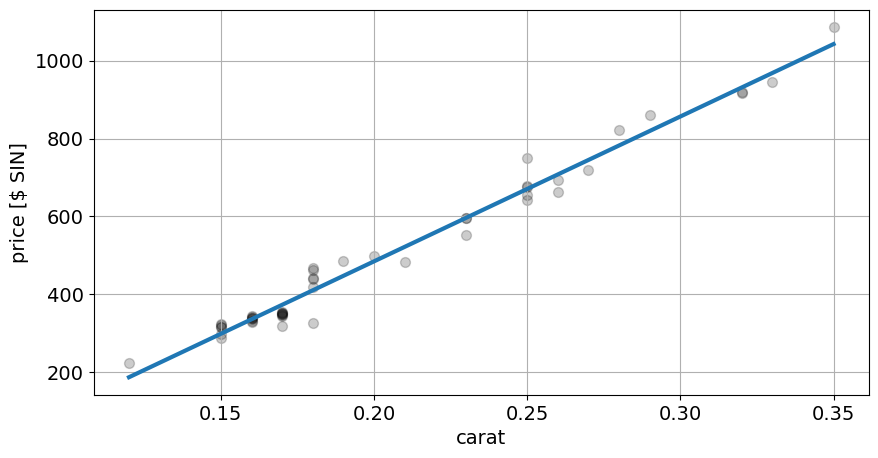

In [3]:
x, y = np.array(diamond['carat'].values), np.array(diamond['price'].values)

xext = sm.add_constant(x)

lm = sm.OLS(y, xext).fit()
beta0, beta1 = lm.params[0], lm.params[1]
print('intercept:', beta0, 'coefficient:', beta1)

x1 = np.linspace(np.min(x), np.max(x), 100)
y1 = beta0 + beta1 * x1

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x, y, c='k', alpha = .2, s=50)
ax.plot(x1, y1, lw=3)
ax.set(xlabel="carat", ylabel="price [$ SIN]")
ax.grid(True)
plt.show()

In [4]:
lm.scale

1013.8188581099834

mean(X): 0.2041666666666667
intercept: 500.0833333333336 coefficient: 3721.024851550472


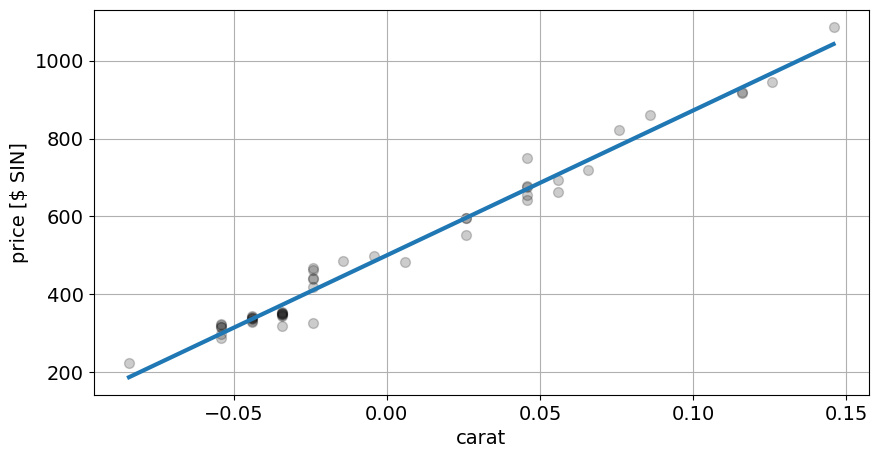

In [5]:
x, y = np.array(diamond['carat'].values), np.array(diamond['price'].values)

print('mean(X):', np.mean(x))
x -= np.mean(x)

xext = sm.add_constant(x)

lm = sm.OLS(y, xext).fit()
beta0, beta1 = lm.params[0], lm.params[1]
print('intercept:', beta0, 'coefficient:', beta1)

x1 = np.linspace(np.min(x), np.max(x), 100)
y1 = beta1 * x1 + beta0

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x, y, c='k', alpha = .2, s=50)
ax.plot(x1, y1, lw=3)
ax.set(xlabel="carat", ylabel="price [$ SIN]")
ax.grid(True)
plt.show()

# Residuals

intercept: -259.62590719155486 coefficient: 3721.024851550472


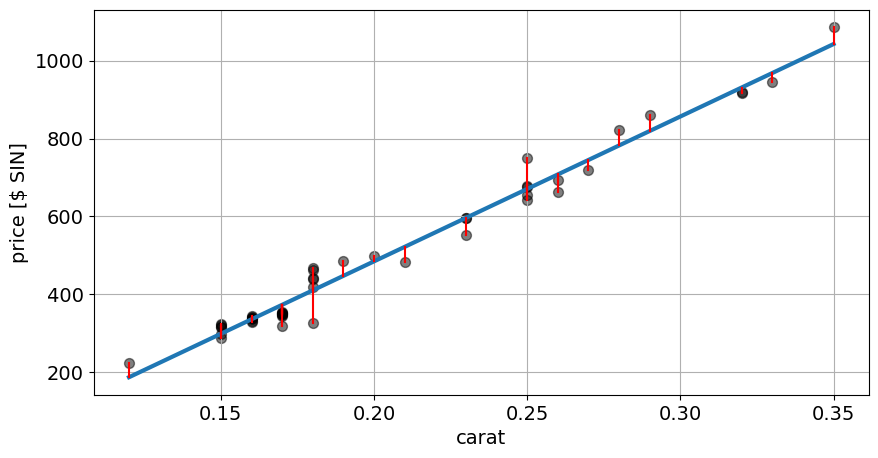

In [6]:
x, y = np.array(diamond['carat'].values), np.array(diamond['price'].values)

xext = sm.add_constant(x)

lm = sm.OLS(y, xext).fit()
beta0, beta1 = lm.params[0], lm.params[1]
print('intercept:', beta0, 'coefficient:', beta1)

def f(x):
    return beta0 + beta1 * x

x1 = np.linspace(np.min(x), np.max(x), 100)
y1 = f(x1)
yf = f(x)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x, y, c='k', alpha = .5, s=50)
ax.plot(x1, y1, lw=3)
[plt.plot([x[i], x[i]], [y[i], yf[i]], c='r') for i in range(len(x))]
ax.set(xlabel="carat", ylabel="price [$ SIN]")
ax.grid(True)
plt.show()

In [7]:
np.sum(y - yf)

1.0743406164692715e-11

In [8]:
# acestea sunt residuals, fie le luam din model, fie calculate
print(lm.resid), print(y - yf)

[-17.94831757  -7.73806906 -22.94831757 -85.15856609 -28.6303057
   6.26193094  23.47217946  37.6311854  -38.78931163  24.47217946
  51.84143391  40.73894876   0.26193094  13.42093688  -1.20980867
  40.52870024  36.10292501 -44.84055421  79.3696943  -25.05080273
  57.84143391   9.26193094 -20.94831757  -3.73806906 -19.94831757
  27.84143391 -54.94831757   8.84143391 -26.94831757  16.47217946
 -22.94831757 -13.1020453  -12.1020453   -0.52782054   3.26193094
   2.26193094  -1.20980867 -43.20980867 -27.94831757 -23.31229382
 -15.6303057   43.26720915  32.84143391   7.3696943    4.3696943
 -11.52782054 -14.84055421  17.47217946]
[-17.94831757  -7.73806906 -22.94831757 -85.15856609 -28.6303057
   6.26193094  23.47217946  37.6311854  -38.78931163  24.47217946
  51.84143391  40.73894876   0.26193094  13.42093688  -1.20980867
  40.52870024  36.10292501 -44.84055421  79.3696943  -25.05080273
  57.84143391   9.26193094 -20.94831757  -3.73806906 -19.94831757
  27.84143391 -54.94831757   8.8414339

(None, None)

In [9]:
# tehnic, suma reziduurilor este zero
np.sum(lm.resid), np.sum(lm.resid * x)

(1.0743406164692715e-11, 2.3447910280083306e-12)

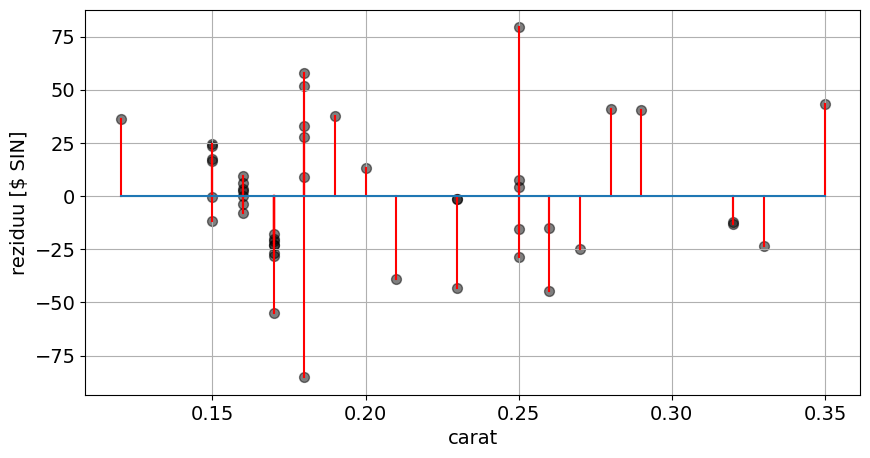

In [10]:
# scatter plot pentru residuals
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x, lm.resid, c='k', alpha = .5, s=50)
[plt.plot([x[i], x[i]], [0, lm.resid[i]], c='r') for i in range(len(x))]
plt.plot([np.min(x), np.max(x)], [0, 0])
ax.set(xlabel="carat", ylabel="reziduu [$ SIN]")
ax.grid(True)
plt.show()

In [11]:
print(np.sqrt(np.sum(lm.resid**2)/(len(lm.resid) - 2)))

31.840522265031762


intercept: 0.8976426141125661 coefficient: 1.3804223677217808


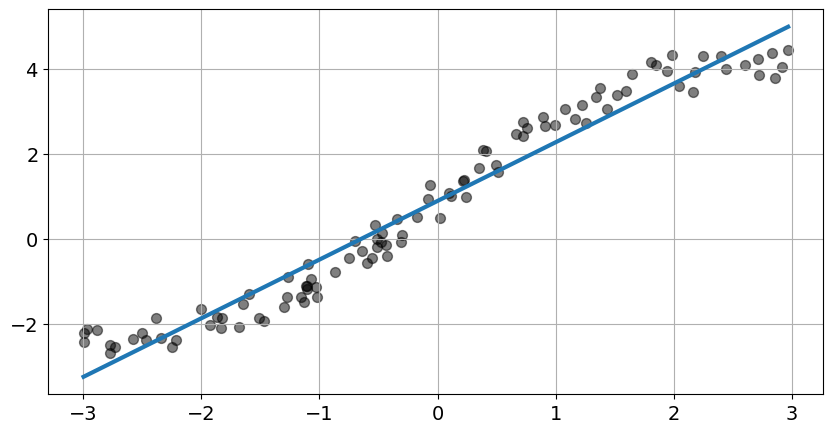

In [12]:
# model cu doua tipuri de variatii, liniara si non-liniara
x = np.random.rand(100) * 6 - 3
y = x + np.sin(x) + np.random.rand(100) + np.sqrt(0.2)

xext = sm.add_constant(x)

lm = sm.OLS(y, xext).fit()
beta0, beta1 = lm.params[0], lm.params[1]
print('intercept:', beta0, 'coefficient:', beta1)

def f(x):
    return beta0 + beta1 * x

x1 = np.linspace(np.min(x), np.max(x), 100)
y1 = f(x1)
yf = f(x)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x, y, c='k', alpha = .5, s=50)
ax.plot(x1, y1, lw=3)
ax.grid(True); plt.show()

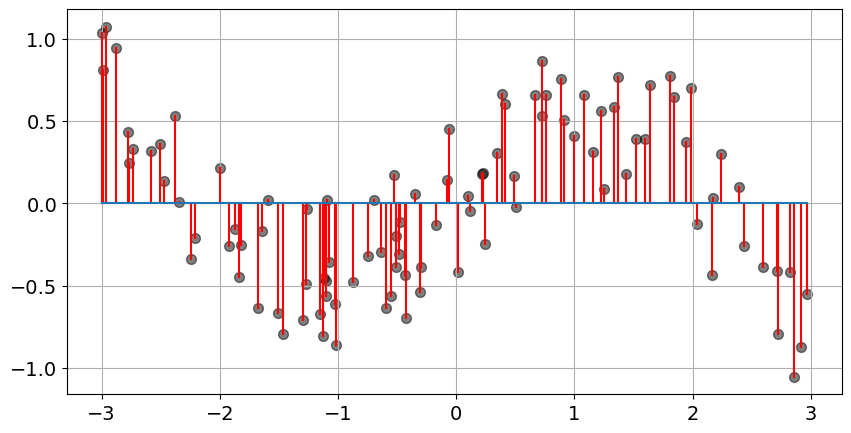

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x, lm.resid, c='k', alpha = .5, s=50)
[plt.plot([x[i], x[i]], [0, lm.resid[i]], c='r') for i in range(len(x))]
plt.plot([np.min(x), np.max(x)], [0, 0])
ax.grid(True)
plt.show()

intercept: 0.00018507900319458814 coefficient: 0.999965625443338


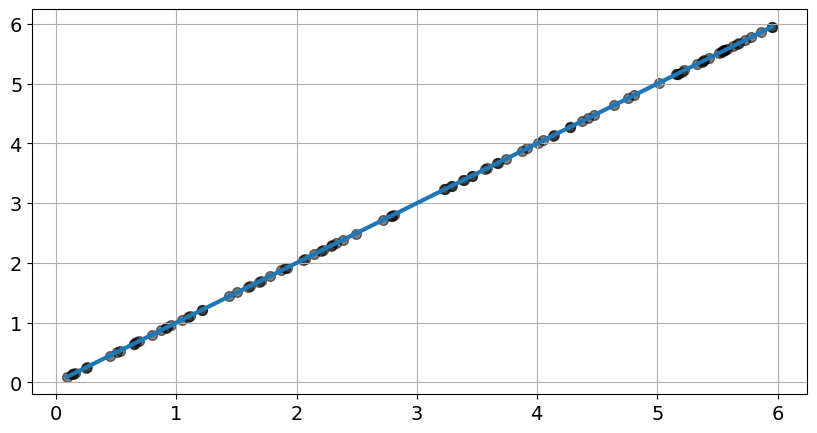

In [14]:
# model cu doua tipuri de variatii, liniara si non-liniara
x = np.random.rand(100) * 6
y = x + (np.random.rand(100) - 0.5) * .001 * x

xext = sm.add_constant(x)

lm = sm.OLS(y, xext).fit()
beta0, beta1 = lm.params[0], lm.params[1]
print('intercept:', beta0, 'coefficient:', beta1)

def f(x):
    return beta0 + beta1 * x

x1 = np.linspace(np.min(x), np.max(x), 100)
y1 = f(x1)
yf = f(x)

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x, y, c='k', alpha = .5, s=50)
ax.plot(x1, y1, lw=3)
ax.grid(True); plt.show()

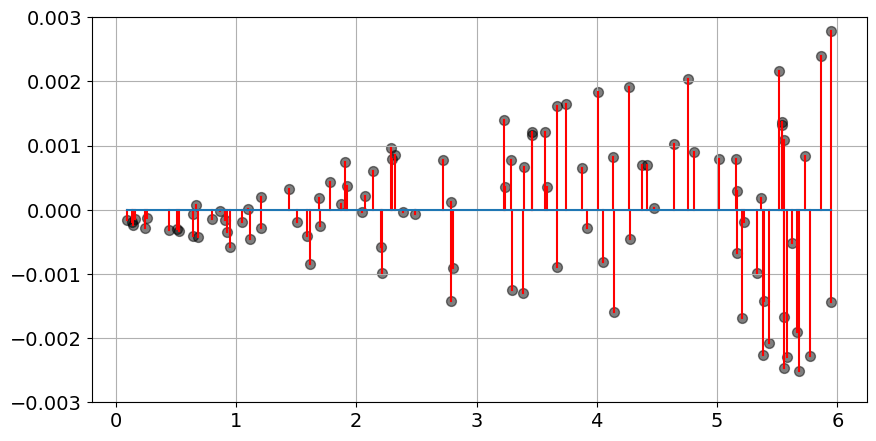

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x, lm.resid, c='k', alpha = .5, s=50)
[plt.plot([x[i], x[i]], [0, lm.resid[i]], c='r') for i in range(len(x))]
plt.plot([np.min(x), np.max(x)], [0, 0])
ax.set_ylim(-0.003, 0.003)
ax.grid(True)
plt.show()

# Constructia statisticilor pentru coeficientii regresiei

In [16]:
# vezi documentatia, http://www.statsmodels.org/stable/examples/notebooks/generated/ols.html
x, y = np.array(diamond['carat'].values), np.array(diamond['price'].values)

xext = sm.add_constant(x)

lm = sm.OLS(y, xext).fit()
beta0, beta1 = lm.params[0], lm.params[1]
print('intercept:', beta0, 'coefficient:', beta1)

n = len(lm.resid)
sigma = np.sqrt(np.sum(lm.resid**2)/(n - 2))
print('sigma:', sigma)

sx = np.sum((x - np.mean(x))**2)
se_beta0 = np.sqrt(1/n + np.mean(x)**2 / sx) * sigma
se_beta1 = sigma / np.sqrt(sx)

stat_beta0, stat_beta1 = beta0 / se_beta0, beta1 / se_beta1
p_beta0 = 2 * stats.t.sf(np.abs(stat_beta0), df=n-2)
p_beta1 = 2 * stats.t.sf(np.abs(stat_beta1), df=n-2)
i_beta0 = beta0 + np.array([-1, 1]) * stats.t.ppf(0.975, df=n-2) * se_beta0
i_beta1 = beta1 + np.array([-1, 1]) * stats.t.ppf(0.975, df=n-2) * se_beta1

intercept: -259.62590719155486 coefficient: 3721.024851550472
sigma: 31.840522265031762


In [17]:
df1 = pd.DataFrame([['beta0', beta0, se_beta0, stat_beta0, p_beta0, i_beta0[0], i_beta0[1]],
                   ['beta1', beta1, se_beta1, stat_beta1, p_beta1, i_beta1[0], i_beta1[1]]],
                columns=['Parameter', 'Estimate', 'Std. Error', 't Value', 'P(>|t|)', '[0.025', '0.975]'])
df2 = pd.DataFrame([['beta0', lm.params[0], lm.bse[0], lm.tvalues[0], lm.pvalues[0], lm.conf_int()[0][0], 
                     lm.conf_int()[0][1]],
                    ['beta1', lm.params[1], lm.bse[1], lm.tvalues[1], lm.pvalues[1], lm.conf_int()[1][0], 
                     lm.conf_int()[1][1]]],                  
                columns=['Parameter', 'Estimate', 'Std. Error', 't Value', 'P(>|t|)', '[0.025', '0.975]'])
print(df1)
print(df2)

  Parameter     Estimate  Std. Error    t Value       P(>|t|)       [0.025  \
0     beta0  -259.625907   17.318856 -14.990938  2.523271e-19  -294.486957   
1     beta1  3721.024852   81.785880  45.497155  6.751260e-40  3556.398413   

        0.975]  
0  -224.764858  
1  3885.651290  
  Parameter     Estimate  Std. Error    t Value       P(>|t|)       [0.025  \
0     beta0  -259.625907   17.318856 -14.990938  2.523271e-19  -294.486957   
1     beta1  3721.024852   81.785880  45.497155  6.751260e-40  3556.398413   

        0.975]  
0  -224.764858  
1  3885.651290  


In [18]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     2070.
Date:                Mon, 13 May 2024   Prob (F-statistic):           6.75e-40
Time:                        14:32:03   Log-Likelihood:                -233.20
No. Observations:                  48   AIC:                             470.4
Df Residuals:                      46   BIC:                             474.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -259.6259     17.319    -14.991      0.0

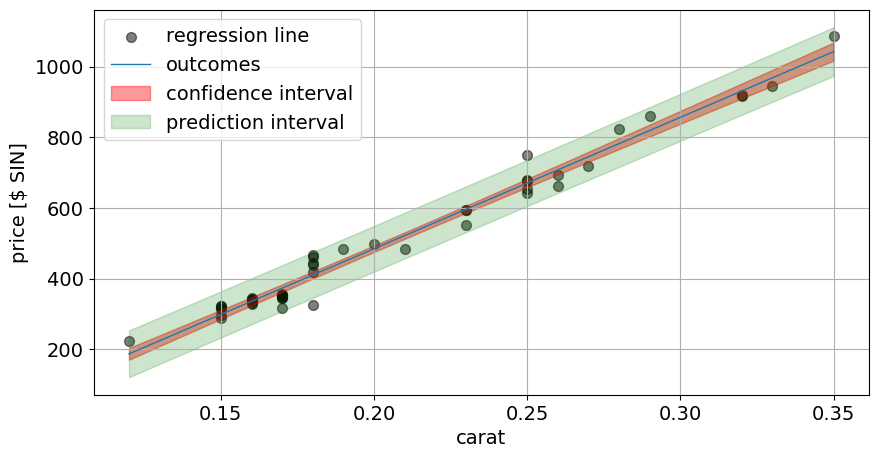

In [19]:
def f(x):
    return beta0 + beta1 * x

x1 = np.linspace(np.min(x), np.max(x), 100)
y1 = f(x1)

# t quantile
t = stats.t.ppf(0.975, df=n-2)

# dispersia reziduurilor
sigma = np.sqrt(np.sum(lm.resid**2)/(n-2))

# confidence interval pentru dreapta
ci = t * sigma * np.sqrt(1/n + (x1-np.mean(x))**2 / np.sum((x-np.mean(x))**2))

# confidence interval pentru predictie (prediction interval)
pi = t * sigma * np.sqrt(1 + 1/n + (x1-np.mean(x))**2 / np.sum((x-np.mean(x))**2))

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(x, y, c='k', alpha = .5, s=50)
ax.plot(x1, y1, lw=1)
ax.fill_between(x1, y1-ci, y1+ci, color='red', alpha=0.4)
ax.fill_between(x1, y1-pi, y1+pi, color='green', alpha=0.2)
ax.set(xlabel="carat", ylabel="price [$ SIN]")
ax.grid(True)
ax.legend(['regression line', 'outcomes', 'confidence interval', 'prediction interval'])
plt.show()

In [20]:
sigma

31.840522265031762

In [21]:
np.std(lm.resid)

31.170120399009274

In [22]:
lm.rsquared

0.978260777986033

In [23]:
x, y, f(x)

(array([0.17, 0.16, 0.17, 0.18, 0.25, 0.16, 0.15, 0.19, 0.21, 0.15, 0.18,
        0.28, 0.16, 0.2 , 0.23, 0.29, 0.12, 0.26, 0.25, 0.27, 0.18, 0.16,
        0.17, 0.16, 0.17, 0.18, 0.17, 0.18, 0.17, 0.15, 0.17, 0.32, 0.32,
        0.15, 0.16, 0.16, 0.23, 0.23, 0.17, 0.33, 0.25, 0.35, 0.18, 0.25,
        0.25, 0.15, 0.26, 0.15]),
 array([ 355,  328,  350,  325,  642,  342,  322,  485,  483,  323,  462,
         823,  336,  498,  595,  860,  223,  663,  750,  720,  468,  345,
         352,  332,  353,  438,  318,  419,  346,  315,  350,  918,  919,
         298,  339,  338,  595,  553,  345,  945,  655, 1086,  443,  678,
         675,  287,  693,  316], dtype=int64),
 array([ 372.94831757,  335.73806906,  372.94831757,  410.15856609,
         670.6303057 ,  335.73806906,  298.52782054,  447.3688146 ,
         521.78931163,  298.52782054,  410.15856609,  782.26105124,
         335.73806906,  484.57906312,  596.20980867,  819.47129976,
         186.89707499,  707.84055421,  670.6303057 ,  7

In [24]:
np.sum((f(x)- np.mean(y))**2) / np.sum((y - np.mean(y))**2)

0.9782607779860324

# Laborator

__Q1__. Potriviți o regresie liniară pentru setul father.son cu father.height ca și predictor pentru son.height. 

a) Dați p-value pentru panta regresiei și formulați cele două ipoteze și interpretați rezultatul testului.

b) Interpretați de asemenea și intercept-ul. Centrați x în zero, re-aplicați regresia și interpretați intercept-ul.

In [248]:
import pandas as pd
import statsmodels.api as sm

father_son = pd.read_csv('father_son.csv')

father_height = father_son['fheight'].values # variabila predictor
son_height = father_son['sheight'].values # variabila raspuns

# adaugarea unei coloane de 1 pentru intercept
X = sm.add_constant(father_height) 

# ajustarea modelului de regresie
regression_model = sm.OLS(son_height, X) # OLS = Ordinary Least Squares (minimul patratelor)
# Folosirea sumei patratelor diferentelor in metoda OLS permite crearea unui model de regresie care minimizeaza erorile mari si 
# simplifica calculul matematic necesar pentru gasirea celei mai bune linii de regresie.
results = regression_model.fit() # Aplicarea modelului pe date
# Metoda fit ajustează modelul de regresie pe datele furnizate. Aceasta calculează coeficientii modelului (inclusiv panta si interceptul) 
# astfel încât să minimizeze suma pătratelor diferentelor dintre valorile observate si cele prezise (metoda celor mai mici patrate).

# a) Panta si p-value
slope = results.params[1] # Coeficientul de panta; masoara cat de mult se schimba inaltimea fiului pentru fiecare unitate de schimbare in inaltimea tatălui.
p_value = results.pvalues[1] # p-value pentru coeficientul de panta; spune daca modificarea observata in inaltimea fiului (panta) este semnificativa din punct de vedere statistic.

print("Coeficient de pantă:", slope)
print("p-value pentru panta regresiei:", p_value)

# Interpretarea rezultatului testului
print("\nInterpretarea rezultatului testului: ")
if slope > 0:
    print("Înălțimea fiului crește odată cu creșterea înălțimii tatălui.")
elif slope < 0:
    print("Înălțimea fiului scade odată cu creșterea înălțimii tatălui.")
else:
    print("Nu există o asociere liniară semnificativă între înălțimea tatălui și înălțimea fiului.")

if p_value < 0.05:
    print("Panta regresiei este semnificativ diferită de zero.")
    print("Există o relație liniară semnificativă între înălțimea tatălui și înălțimea fiului.")
else:
    print("Panta regresiei nu este semnificativ diferită de zero.")
    print("Nu există o relație liniară semnificativă între înălțimea tatălui și înălțimea fiului.")

# b) Intercept si centrare
# Interceptul initial
intercept_initial = results.params[0] 
print("\nInterceptul înainte de centrare:", intercept_initial)

# Centrarea variabilei predictor
#Dupa centrarea inaltimii tatălui, interceptul este inaltimea prezisa a fiului cand inaltimea tatalui este media inaltimilor tatilor(fara centrare, 
#interceptul este inaltimea estimata a fiului cand inaltimea tatalui este zero, ceea ce nu este realist)
father_height_centered = father_height - father_son['fheight'].mean() #(acest lucru face ca media noii variabile să fie zero).

# Reaplicarea regresiei cu variabila centrata
X_centered = sm.add_constant(father_height_centered) 
regression_model_centered = sm.OLS(son_height, X_centered) 
results_centered = regression_model_centered.fit()

# Interceptul dupa centrare
intercept_centered = results_centered.params[0]
print("Intercept după centraterea variabilei predictor x în zero:", intercept_centered)

# Interpretare:
# Interceptul initial indica inaltimea estimata a fiului atunci cand inaltimea tatalui este zero,
# ceea ce nu este realist. Interceptul centrat indica inaltimea estimata a fiului atunci cand
# inaltimea tatalui este media inaltimilor tatalui din setul de date.


Coeficient de pantă: 0.5140930386233065
p-value pentru panta regresiei: 1.121267549632982e-69

Interpretarea rezultatului testului: 
Înălțimea fiului crește odată cu creșterea înălțimii tatălui.
Panta regresiei este semnificativ diferită de zero.
Există o relație liniară semnificativă între înălțimea tatălui și înălțimea fiului.

Interceptul înainte de centrare: 33.88660435407803
Intercept după centraterea variabilei predictor x în zero: 68.6840696567718


__Q2__. Pentru același set father.son, preziceți înălțimea fiului dacă tatăl are înălțimea 80. Ați recomanda această predicție? Care este intervalul de confidență asociat predicției (care este intevalul de valori 95%)?

In [249]:
# Predictia inaltimii fiului când inaltimea tatalui este 80
father_height_new = 80
son_height_predicted = results_centered.predict([1, father_height_new - father_son['fheight'].mean()])[0] 
# predict() primeste ca argumente o lista cu interceptul si valoarea centrata a variabilei predictor si returnează o lista de predictii, iar noi vrem doar prima(si singura) valoare

print("\nPredicția înălțimii fiului când înălțimea tatălui este 80:", son_height_predicted)

# Intervalul de confidenta asociat predictiei
#array cu limitele inferioare si superioare ale intervalelor de confidenta pentru toate predictiile. [0] este utilizat pentru a extrage intervalul de confidenta pentru prima (si singura) predictie.
confidence_interval = results_centered.get_prediction([1, father_height_new - father_son['fheight'].mean()]).conf_int()[0]
print("Intervalul de confidență 95% pentru predicția înălțimii fiului când înălțimea tatălui este 80:", confidence_interval)

#Recomandare
#Recomand aceasta predictie deoarece intervalul de confidenta este destul de ingust, ceea ce inseamnă ca suntem relativ siguri de valoarea prezisa.




Predicția înălțimii fiului când înălțimea tatălui este 80: 75.01404744394254
Intervalul de confidență 95% pentru predicția înălțimii fiului când înălțimea tatălui este 80: [74.34452279 75.6835721 ]


__Q3__. Pentru setul mtcars:

a) Realizați regresia liniară pentru mpg ca și răspuns (outcome) respectiv horsepower ca și predictor. Dați interpretarea coeficienților, recentrînd x dacă e necesar. 

b) Puneți dreapta de regresie pe un scatterplot.

c) Testați ipoteza că nu există nici o corelație liniară între horsepower și mpg.

d) Ridicați un plot al reziduurilor vs. horsepower. Estimați dispersia reziduurilor direct, respectiv folosind modelul calculat.

e) Care este R-squared și ce exprimă el pentru acest caz?

In [250]:
# a) Realizați regresia liniară pentru mpg ca și răspuns (outcome) respectiv horsepower ca și predictor.
# Dați interpretarea coeficienților, recentrînd x dacă e necesar.
import statsmodels.api as sm

mtcars = sm.datasets.get_rdataset('mtcars').data # incarcarea setului de date mtcars

X = mtcars['hp'] # variabila predictor
Y = mtcars['mpg'] # variabila raspuns

X = sm.add_constant(X) # adaugarea unei coloane de 1 pentru intercept 

regression_model = sm.OLS(Y, X) # ajustarea modelului de regresie
results = regression_model.fit() # aplicarea modelului pe date

print(results.summary()) # afisarea rezultatelor regresiei

intercept = results.params[0] # interceptul
slope = results.params[1] # coeficientul de panta

print("Coeficientul de intercept:", intercept)
print("Coeficientul de pantă:", slope)

X_centered = X - X.mean() # centrarea variabilei predictor

regression_model_centered = sm.OLS(Y, X_centered) # reaplicarea regresiei cu variabila centrata
results_centered = regression_model_centered.fit() # aplicarea modelului pe date

print(results_centered.summary())

# Interpretarea coeficientilor:

# Coeficientul de intercept indica valoarea estimata a mpg 
# atunci cand variabila horsepower este zero

# Coeficientul de panta arata cum se estimeaza ca se schimba consumul de combustibil 
# (miles per gallon) pe masura ce puterea motorului (horsepower) creste cu o unitate.



                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     45.46
Date:                Mon, 13 May 2024   Prob (F-statistic):           1.79e-07
Time:                        20:46:23   Log-Likelihood:                -87.619
No. Observations:                  32   AIC:                             179.2
Df Residuals:                      30   BIC:                             182.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.0989      1.634     18.421      0.0

C:\Users\Miruna\AppData\Local\Temp\ipykernel_4384\1714601049.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept = results.params[0] # interceptul
C:\Users\Miruna\AppData\Local\Temp\ipykernel_4384\1714601049.py:18: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  slope = results.params[1] # coeficientul de panta
d:\Anaconda\envs\ISML\Lib\site-packages\statsmodels\regression\linear_model.py:1965: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


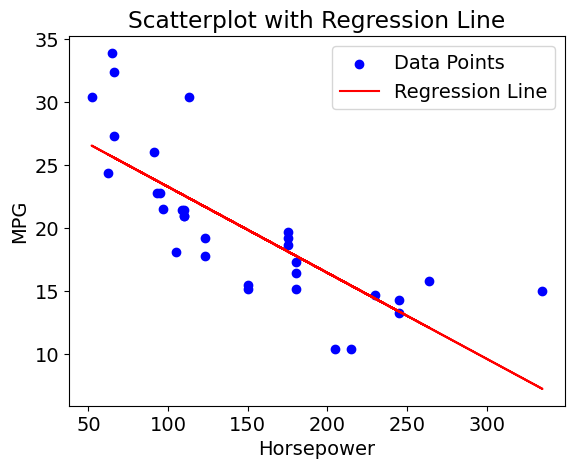

In [251]:
# b) Puneți dreapta de regresie pe un scatterplot.

import matplotlib.pyplot as plt

plt.scatter(X['hp'], Y, color='blue', label='Data Points') # puterea motorului pe axa x si inaltimea mpg pe axa y.

plt.plot(X['hp'], intercept + slope * X['hp'], color='red', label='Regression Line') # dreapta de regresie

plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Scatterplot with Regression Line')

plt.legend()

plt.show()

#dreapta inclinata in jos, ceea ce inseamna ca consumul de combustibil (mpg) scade pe masura ce puterea motorului (horsepower) creste

In [252]:
# c) Testați ipoteza că nu există nici o corelație liniară între horsepower și mpg.

p_value = results.pvalues[1] # p-value pentru coeficientul de panta(1)
#legatura dintre p_value si panta este ca panta este coeficientul care masoara corelatia liniara dintre variabilele predictor si raspuns, iar p_Value este o masura a semnificatiei acestei corelatii.

print("p-value pentru testul de corelație liniară:", p_value)

alpha = 0.05  

if p_value < alpha:
    print("Rejectăm ipoteza nulă.")
    print("Există o corelație liniară semnificativă între horsepower și mpg.")
else:
    print("Nu avem suficiente dovezi pentru a respinge ipoteza nulă.")
    print("Nu există o corelație liniară semnificativă între horsepower și mpg.")


p-value pentru testul de corelație liniară: 1.7878352541210553e-07
Rejectăm ipoteza nulă.
Există o corelație liniară semnificativă între horsepower și mpg.


C:\Users\Miruna\AppData\Local\Temp\ipykernel_4384\1017289535.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = results.pvalues[1] # p-value pentru coeficientul de panta(1)


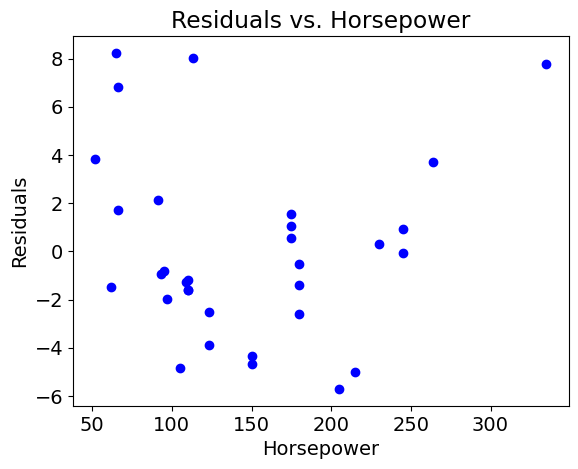

Dispersia reziduurilor estimată direct: 14.441106888535545
Dispersia reziduurilor estimată utilizând modelul: 14.922477118153394


In [253]:
# d)Ridicați un plot al reziduurilor vs. horsepower. Estimați dispersia reziduurilor direct,
# respectiv folosind modelul calculat.

#reziduuri = valori observate - valori prezise

Y_predicted = results.predict(X) # valori prezise

residuals = Y - Y_predicted # reziduurile

plt.scatter(X['hp'], residuals, color='blue')
plt.xlabel('Horsepower')
plt.ylabel('Residuals')
plt.title('Residuals vs. Horsepower')
plt.show()

#dispersia reziduurilor e folosita pentru a evalua cat de bine se potrivesc valorile prezise cu valorile observate
residuals_variance_direct = residuals.var() # dispersia reziduurilor estimată direct, folosind formula pentru dispersie(variance)
print("Dispersia reziduurilor estimată direct:", residuals_variance_direct)

residuals_variance_model = results.mse_resid # dispersia reziduurilor estimată utilizând modelul, folosind metoda mse_resid din rezultatele regresiei 
print("Dispersia reziduurilor estimată utilizând modelul:", residuals_variance_model)

#graficul de mai jos arata ca reziduurile sunt distribuite aproximativ uniform in jurul axei orizontale, ceea ce sugereaza ca modelul de regresie este adecvat
#daca erau prezente modele in reziduuri, ar fi indicat faptul ca modelul nu este adecvat

In [254]:
# e) Care este R-squared și ce exprimă el pentru acest caz?

r_squared = results.rsquared #trb sa fie f aproape de 1

print("Valoarea R-squared:", r_squared)
print("Prin urmare, {:.2f}% din variatia variabilei de raspuns este explicata de modelul de regresie utilizand variabila predictor, iar restul de {:.2f}% reprezinta variatia ce nu poate fi explicata de model.".format(r_squared*100, (1-r_squared)*100))

#valoarea R-squared exprima cat de bine putem explica variatia
# in consumul de combustibil (mpg) al masinilor din setul de date "mtcars" utilizand puterea
# motoarelor (horsepower) ca predictor in modelul de regresie liniara.
#cu cat R-squared este mai aproape de 1, cu atat linia se potriveste mai bine punctelor, ceea ce inseamna ca modelul este mai bun la explicarea variatiei din date.

Valoarea R-squared: 0.6024373414239339
Prin urmare, 60.24% din variatia variabilei de raspuns este explicata de modelul de regresie utilizand variabila predictor, iar restul de 39.76% reprezinta variatia ce nu poate fi explicata de model.


__Q4__. Pentru setul father.son:

a) Calculați intervalul de confidență pentru intercept și pentru slope.

b) Calculați intervalul de confidență pentru valoarea așteptată a înălțimii fiului pentru valoarea medie a înălțimii taților (confidence interval pentru linia de regresie, într-un punct dat).

c) Calculați prediction interval pentru înălțimea fiului pentru valoarea medie a înălțimii taților (confidence interval pentru predicție, într-un punct dat).

d) Puneți pe un scatter plot punctele, dreapta de regresie și intervalele de confidență pentru valoarea așteptată respectiv predicție.

In [255]:
#a) Calculați intervalul de confidență pentru intercept și pentru slope.
import pandas as pd
import statsmodels.api as sm

father_son = pd.read_csv('father_son.csv')

father_height = father_son['fheight'].values
son_height = father_son['sheight'].values

father_height = sm.add_constant(father_height)

regression_model = sm.OLS(son_height, father_height) 
results = regression_model.fit()

intercept_interval = results.conf_int()[0]
print("Intervalul de confidență pentru intercept:", intercept_interval)

slope_interval = results.conf_int()[1]
print("Intervalul de confidență pentru slope:", slope_interval)


Intervalul de confidență pentru intercept: [30.29121257 37.48199614]
Intervalul de confidență pentru slope: [0.46101879 0.56716729]


In [256]:
# #b) Calculați intervalul de confidență pentru valoarea așteptată a înălțimii fiului pentru valoarea medie a înălțimii taților (confidence interval pentru linia de regresie, într-un punct dat).

#media inaltimii tatilor
father_height_mean = father_son['fheight'].mean()

# intervalul de confidenta pentru predictia la valoarea medie a inaltimii tatilor
prediction = results.get_prediction([1, father_height_mean])
confidence_interval = prediction.conf_int(alpha=0.05)  # Interval de confidenta de 95%

ci_lower, ci_upper = confidence_interval[0]

print("Intervalul de confidență 95% pentru valoarea așteptată a înălțimii fiului pentru valoarea medie a înălțimii taților:", (ci_lower, ci_upper))



Intervalul de confidență 95% pentru valoarea așteptată a înălțimii fiului pentru valoarea medie a înălțimii taților: (68.53845541171124, 68.82968390183241)


In [257]:
# c) Calculați prediction interval pentru înălțimea fiului pentru valoarea medie a înălțimii taților
# (confidence interval pentru predicție, într-un punct dat).

prediction_interval = prediction.conf_int(obs=True)  #obs= True fol. pt. un interval de predictie (pentru o observație individuală), nu pt. un interval de confidență (pentru medie).

pi_lower, pi_upper = prediction_interval[0]

predicted_son_height = prediction.predicted_mean[0] #predicted_mean este valoarea prezisa a inaltimii fiului pentru valoarea medie a inaltimii tatilor

print("Predicția înălțimii fiului pentru valoarea medie a înălțimii tatălui:", predicted_son_height)
print("Prediction interval pentru înălțimea fiului:", (pi_lower, pi_upper))



Predicția înălțimii fiului pentru valoarea medie a înălțimii tatălui: 68.68406965677183
Prediction interval pentru înălțimea fiului: (63.900913217204675, 73.46722609633898)


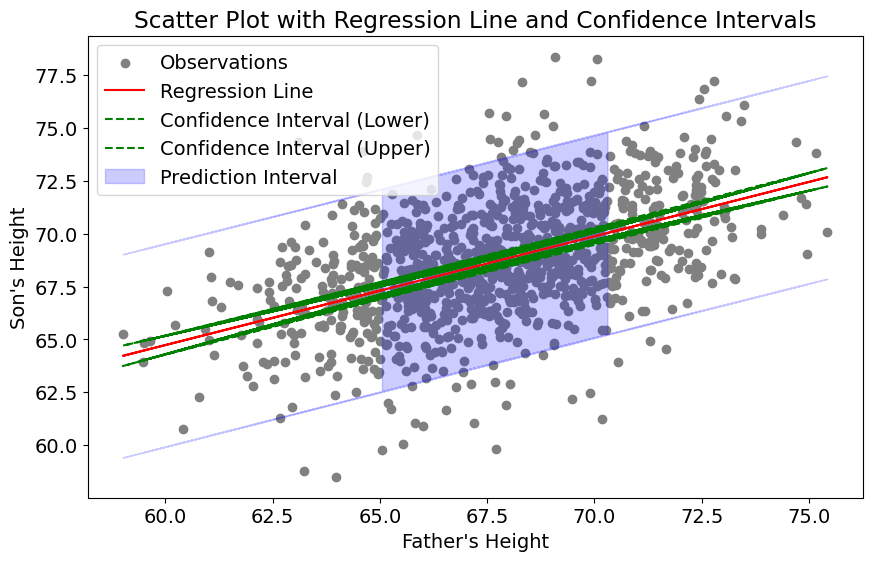

In [258]:
# d) Puneți pe un scatter plot punctele, dreapta de regresie și intervalele de confidență 
# pentru valoarea așteptată respectiv predicție.

# Calcularea intervalului de confidenta si intervalului de predictie
#predictiile si intervalele pentru toate punctele din setul de date, nu doar pentru medie, ca mai sus

father_height = father_son['fheight'].values
son_height = father_son['sheight'].values
X = sm.add_constant(father_height)
regression_model = sm.OLS(son_height, X)
results = regression_model.fit()

# Calcularea intervalului de confidență și intervalului de predicție
predictions = results.get_prediction(X)
confidence_intervals = predictions.conf_int()
prediction_intervals = predictions.conf_int(obs=True)

# Obtinerea valorilor necesare pentru plot
fitted_values = results.fittedvalues #va contine valorile prezise pentru fiecare observatie

# Generarea graficului
plt.figure(figsize=(10, 6))
plt.scatter(father_height, son_height, label='Observations', color='gray') #punctele din setul de date
plt.plot(father_height, fitted_values, color='red', label='Regression Line') #linia de regresie

# Intervalul de confidență pentru valorile așteptate
plt.plot(father_height, confidence_intervals[:, 0], color='green', linestyle='--', label='Confidence Interval (Lower)') #linia de jos a intervalului de confidenta
plt.plot(father_height, confidence_intervals[:, 1], color='green', linestyle='--', label='Confidence Interval (Upper)') #linia de sus a intervalului de confidenta

# Intervalul de predicție pentru observații individuale
plt.fill_between(father_height, prediction_intervals[:, 0], prediction_intervals[:, 1], color='blue', alpha=0.2, label='Prediction Interval') #umplerea intervalului de predictie

plt.xlabel("Father's Height")
plt.ylabel("Son's Height")
plt.title("Scatter Plot with Regression Line and Confidence Intervals")
plt.legend()
plt.show()



__Q5__. Pentru setul mtcars, realizați același lucruri ca la întrebarea anterioară.

In [259]:
#a)intervalul de confidență pentru intercept și pentru slope.
import statsmodels.api as sm

mtcars = sm.datasets.get_rdataset('mtcars').data

X = mtcars['hp']
Y = mtcars['mpg']

X = sm.add_constant(X)

regression_model = sm.OLS(Y, X)
results = regression_model.fit()

confidence_intervals = results.conf_int()
confidence_interval_intercept = confidence_intervals.iloc[0]  # Interval de confidenta pentru intercept
confidence_interval_slope = confidence_intervals.iloc[1]      # Interval de confidenta pentru slope
#iloc este folosit pentru a selecta datele pe baza pozitiei lor în DataFrame; iloc[0] selectează prima linie, iar iloc[1] selectează a doua linie

print("Intervalul de confidență pentru intercept:")
print(confidence_interval_intercept.values)
print("\nIntervalul de confidență pentru slope:")
print(confidence_interval_slope.values)


Intervalul de confidență pentru intercept:
[26.76194879 33.43577229]

Intervalul de confidență pentru slope:
[-0.08889465 -0.0475619 ]


In [260]:
# b) intervalul de confidență pentru valoarea așteptată a mpg pentru horsepower mean (confidence interval pentru linia de regresie, într-un punct dat).

# Calcularea mediei hp
mean_hp = X['hp'].mean()

# Obtinerea predictiei si intervalului de confidenta pentru valoarea medie a hp
prediction = results.get_prediction([1, mean_hp]) #predictia pentru valoarea medie a hp
prediction_summary = prediction.summary_frame()  #rezumat al predictiei

predicted_mpg = prediction_summary['mean'][0] #valoarea asteptata a mpg pentru valoarea medie a hp
confidence_interval = prediction_summary[['mean_ci_lower', 'mean_ci_upper']].iloc[0] #intervalul de confidenta pentru valoarea asteptata a mpg

print("Valoarea așteptată a mpg pentru horsepower mean:", predicted_mpg)
print("Intervalul de confidență pentru mpg:", confidence_interval.values)



Valoarea așteptată a mpg pentru horsepower mean: 20.090625000000017
Intervalul de confidență pentru mpg: [18.69599452 21.48525548]


In [261]:
# c) Calculați prediction interval pentru mpg pentru horsepower mean
# (confidence interval pentru predicție, într-un punct dat).

prediction_interval = prediction_summary[['obs_ci_lower', 'obs_ci_upper']].iloc[0]

print("Prediction interval pentru mpg:", prediction_interval.values)

Prediction interval pentru mpg: [12.07908285 28.10216715]


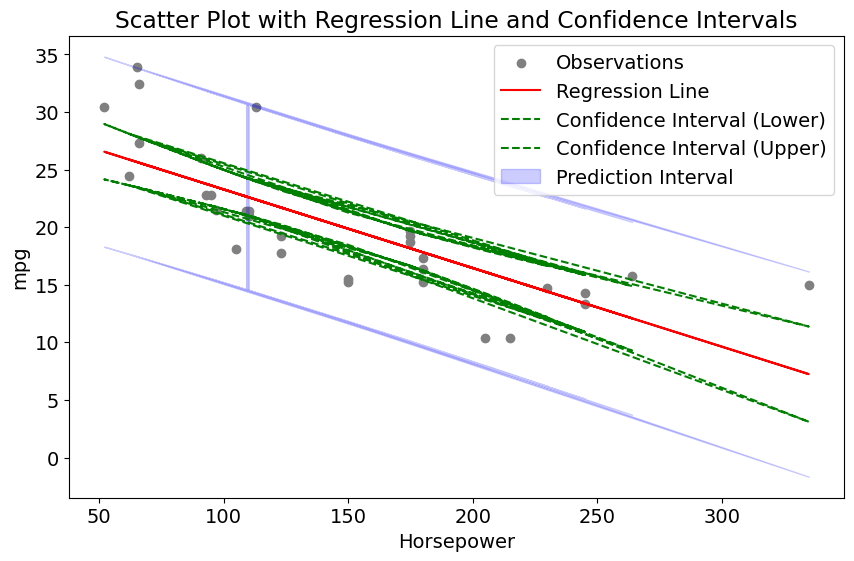

In [262]:
#d)Puneți pe un scatter plot punctele, dreapta de regresie și intervalele de confidență 
# pentru valoarea așteptată respectiv predicție.

import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd

# Loading the data
mtcars = sm.datasets.get_rdataset('mtcars').data

X = mtcars['hp']
Y = mtcars['mpg']

# Adding a constant term to the predictor
X_with_const = sm.add_constant(X)

# Fitting the OLS model
regression_model = sm.OLS(Y, X_with_const)
results = regression_model.fit()

# Obtaining predictions and confidence intervals
predictions = results.get_prediction(X_with_const)
prediction_summary = predictions.summary_frame()

# Generating the plot
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, label='Observations', color='gray')
plt.plot(X, results.fittedvalues, color='red', label='Regression Line')

# Confidence interval for the expected values
plt.plot(X, prediction_summary['mean_ci_lower'], color='green', linestyle='--', label='Confidence Interval (Lower)')
plt.plot(X, prediction_summary['mean_ci_upper'], color='green', linestyle='--', label='Confidence Interval (Upper)')

# Prediction interval for individual observations
plt.fill_between(X, prediction_summary['obs_ci_lower'], prediction_summary['obs_ci_upper'], color='blue', alpha=0.2, label='Prediction Interval')

plt.xlabel("Horsepower")
plt.ylabel("mpg")
plt.title("Scatter Plot with Regression Line and Confidence Intervals")
plt.legend()
plt.show()


__Q6__. Construiți două dataset-uri, y funcție de x, unul fără și altul cu variație reziduală (heteroscedasticity). x-urile vor fi comune (de exemplu, x = 1 .. 10). Mediile și dispersiile lor trebuie să fie egale. 

a) Determinați dreptele de regresie.

b) Ridicați diagrama reziduurilor.

c) Determinați R-squared.

d) Afișați intevalele de confidență pentru răspunsul așteptat (dreapta de regresie) respectiv pentru predicție.

Ce concluzii trageți?

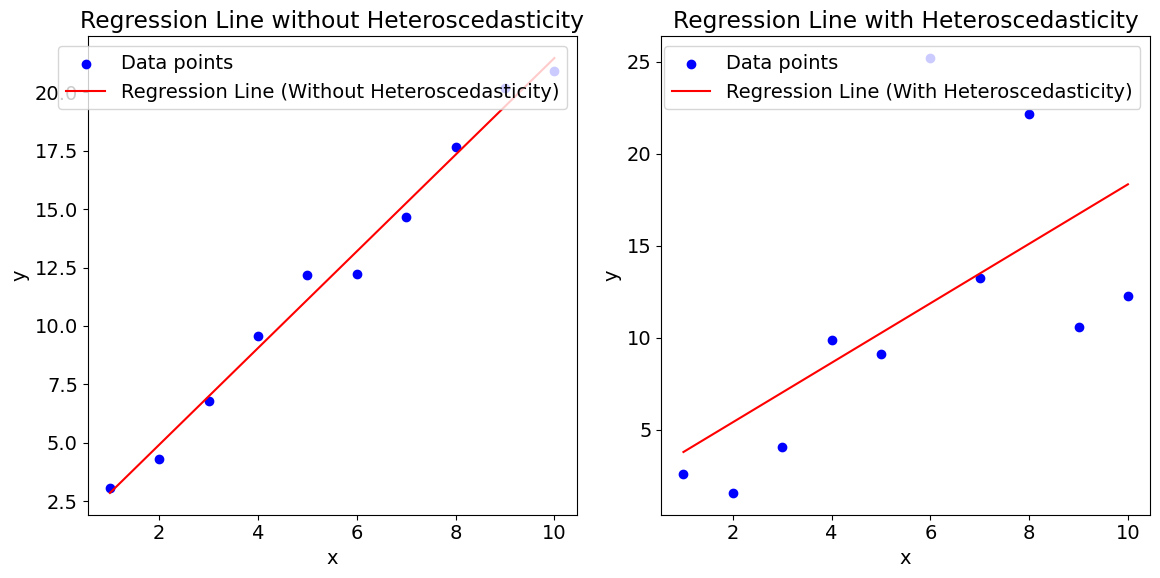

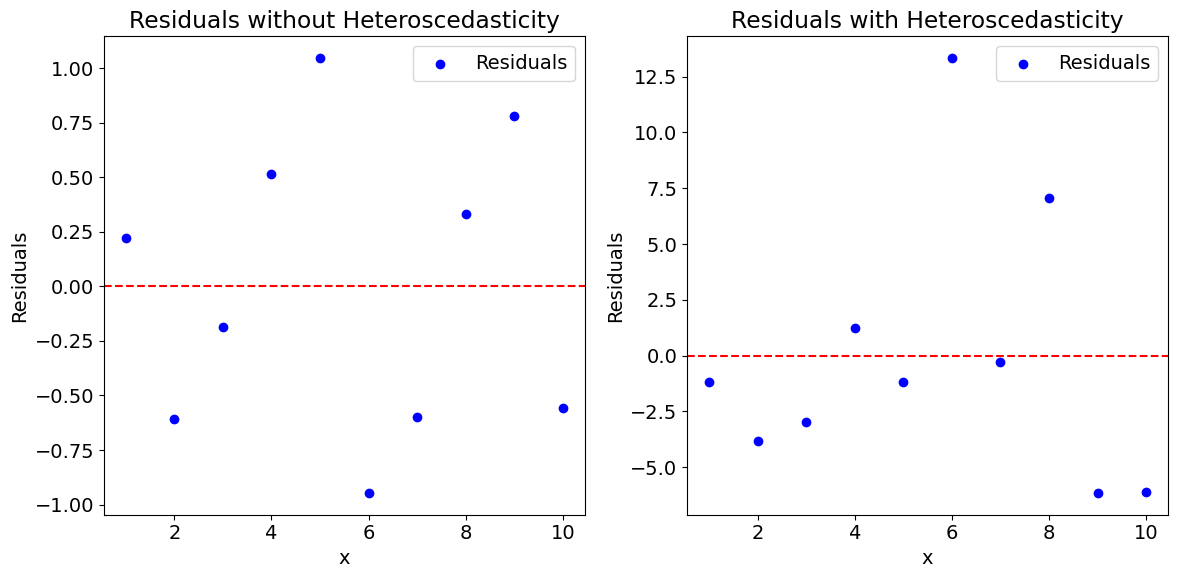

R-squared (Without Heteroscedasticity): 0.9885041808856325
R-squared (With Heteroscedasticity): 0.3946863419478148
Confidence Interval for Expected Response (Without Heteroscedasticity):
[[-0.33622752  1.91856905]
 [ 1.8848785   2.24827187]]
Prediction Interval (Without Heteroscedasticity):
[[ 0.94345259  4.77203931]
 [ 3.08030118  6.76834109]
 [ 5.20139151  8.78040114]
 [ 7.30525214 10.80969089]
 [ 9.39077079 12.85732261]
 [11.45734598 14.92389779]
 [13.5049777  17.00941645]
 [15.53426744 19.11327708]
 [17.54632749 21.2343674 ]
 [19.54262927 23.371216  ]]
Confidence Interval for Expected Response (With Heteroscedasticity):
[[-7.95315704 12.30385946]
 [-0.01563306  3.24908076]]
Prediction Interval (With Heteroscedasticity):
[[-13.40587211  20.99002224]
 [-11.15781433  21.97541216]
 [ -9.0513283   23.10237383]
 [ -7.09963332  24.38412655]
 [ -5.31272198  25.83066291]
 [ -3.69599813  27.44738676]
 [ -2.24946176  29.2342981 ]
 [ -0.96770904  31.18599308]
 [  0.15925262  33.29247912]
 [  1

In [263]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import r2_score

# Datele x comune
x = np.arange(1, 11) # x = [1, 2, 3, ..., 10]

# Generarea erorilor
mean = 0
variance = 1
errors_without_heteroscedasticity = np.random.normal(mean, variance, len(x))  # erori cu varianta constanta; varianta reziduurilor este constanta pentru toate valorile predictorului
errors_with_heteroscedasticity = np.random.normal(mean, variance * x, len(x)) # erori cu varianta variabila; varianta erorilor creste sau scade in functie de valoarea predictorului x, 
#ceea ce inseamna ca varianta reziduurilor nu este constanta

# Functia liniara y
def function_y(x):
    return 2 * x + 1

# Seturi de date y
y_without_heteroscedasticity = function_y(x) + errors_without_heteroscedasticity # y = 2x + 1 + erori cu varianta constanta
y_with_heteroscedasticity = function_y(x) + errors_with_heteroscedasticity # y = 2x + 1 + erori cu varianta variabila

# a) Calcularea dreptelor de regresie
X_with_intercept = sm.add_constant(x) # adaugarea unei coloane de 1 pentru intercept

# Fara variatie reziduala (heteroscedasticity)
model_without_heteroscedasticity = sm.OLS(y_without_heteroscedasticity, X_with_intercept) # OLS = Ordinary Least Squares (minimul patratelor)
results_without_heteroscedasticity = model_without_heteroscedasticity.fit() # aplicarea modelului pe date; ajusteaza modelul si calculeaza coeficientii de regresie

# Cu variatie reziduala (heteroscedasticity)
model_with_heteroscedasticity = sm.OLS(y_with_heteroscedasticity, X_with_intercept)
results_with_heteroscedasticity = model_with_heteroscedasticity.fit()

# Plotarea dreptelor de regresie
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(x, y_without_heteroscedasticity, label='Data points', color='blue')
plt.plot(x, results_without_heteroscedasticity.fittedvalues, color='red', label='Regression Line (Without Heteroscedasticity)') #fittedvalues returneaza valorile prezise de model
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regression Line without Heteroscedasticity')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(x, y_with_heteroscedasticity, label='Data points', color='blue')
plt.plot(x, results_with_heteroscedasticity.fittedvalues, color='red', label='Regression Line (With Heteroscedasticity)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Regression Line with Heteroscedasticity')
plt.legend()

plt.tight_layout()
plt.show()

# b) Ridicarea diagramei reziduurilor
residuals_without_heteroscedasticity = results_without_heteroscedasticity.resid 
residuals_with_heteroscedasticity = results_with_heteroscedasticity.resid

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(x, residuals_without_heteroscedasticity, label='Residuals', color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('x')
plt.ylabel('Residuals')
plt.title('Residuals without Heteroscedasticity')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(x, residuals_with_heteroscedasticity, label='Residuals', color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('x')
plt.ylabel('Residuals')
plt.title('Residuals with Heteroscedasticity')
plt.legend()

plt.tight_layout() # ajusteaza automat subploturile pentru a se potrivi in fereastra
plt.show()

# c) Calcularea R-squared
r2_without_heteroscedasticity = r2_score(y_without_heteroscedasticity, results_without_heteroscedasticity.fittedvalues) #r2_score calculeaza coeficientul de determinare,care masoara cat de bine se potriveste linia de regresie cu datele
r2_with_heteroscedasticity = r2_score(y_with_heteroscedasticity, results_with_heteroscedasticity.fittedvalues)

print("R-squared (Without Heteroscedasticity):", r2_without_heteroscedasticity)
print("R-squared (With Heteroscedasticity):", r2_with_heteroscedasticity)

# d) Calcularea intervalelor de confidenta
confidence_interval_expected_without_heteroscedasticity = results_without_heteroscedasticity.conf_int(alpha=0.05) #Suntem 95% siguri ca media estimata a y (valorile prezise) la fiecare x se afla in acest interval.
prediction_interval_without_heteroscedasticity = results_without_heteroscedasticity.get_prediction(X_with_intercept).conf_int(alpha=0.05, obs=True) #Suntem 95% siguri ca val obs ale y la fiecare x se afla in acest interval.

confidence_interval_expected_with_heteroscedasticity = results_with_heteroscedasticity.conf_int(alpha=0.05)
prediction_interval_with_heteroscedasticity = results_with_heteroscedasticity.get_prediction(X_with_intercept).conf_int(alpha=0.05, obs=True)

print("Confidence Interval for Expected Response (Without Heteroscedasticity):")
print(confidence_interval_expected_without_heteroscedasticity)
print("Prediction Interval (Without Heteroscedasticity):")
print(prediction_interval_without_heteroscedasticity)

print("Confidence Interval for Expected Response (With Heteroscedasticity):")
print(confidence_interval_expected_with_heteroscedasticity)
print("Prediction Interval (With Heteroscedasticity):")
print(prediction_interval_with_heteroscedasticity)
